# An√°lisis de Datos de Airbnb en Santiago de Chile: Tendencias y Perspectivas

## Introducci√≥n

En este an√°lisis, explorar√© un conjunto de datos de Airbnb correspondiente a Santiago de Chile, con el objetivo de identificar las principales tendencias y patrones en el mercado de alquileres a corto plazo en la ciudad. Mi enfoque ser√° generar insights valiosos que puedan beneficiar tanto a anfitriones como a hu√©spedes. Durante el an√°lisis, buscar√© responder a preguntas clave como:

- ¬øCu√°l es la distribuci√≥n de los precios de las propiedades?
- ¬øCu√°les son los tipos de habitaciones m√°s populares en la plataforma?
- ¬øExisten diferencias en los precios seg√∫n el tipo de habitaci√≥n o la ubicaci√≥n?
- ¬øC√≥mo var√≠an las rese√±as a lo largo del tiempo y qu√© factores podr√≠an influir en ellas?

Este estudio proporcionar√° una visi√≥n integral del mercado de Airbnb en Santiago, √∫til para optimizar decisiones tanto para quienes alquilan sus propiedades como para quienes buscan hospedaje.


## ¬øQu√© es Airbnb?

Airbnb es una plataforma estadounidense de alquiler de propiedades a corto plazo que conecta a anfitriones que desean alquilar sus espacios con viajeros que buscan alojamiento. Fundada en San Francisco, Airbnb permite a los usuarios reservar estancias en hogares, apartamentos, y otros tipos de alojamientos a nivel mundial. Los anfitriones pueden listar sus propiedades y los hu√©spedes pueden reservarlos a trav√©s de la web o la aplicaci√≥n m√≥vil de Airbnb. La empresa no posee los alojamientos listados; en cambio, genera ingresos a trav√©s de comisiones por cada reserva realizada.

En cuanto al mercado chileno, especialmente en Santiago, Airbnb ha tenido un crecimiento significativo en los √∫ltimos a√±os. La plataforma ofrece una alternativa a los hoteles tradicionales, con una amplia variedad de opciones que van desde habitaciones privadas en apartamentos hasta casas completas, lo que permite a los viajeros una experiencia m√°s personalizada y, a menudo, m√°s econ√≥mica.

En este an√°lisis, me centrar√© en los datos de Airbnb de Santiago, observando la distribuci√≥n de los precios, los tipos de habitaci√≥n m√°s comunes, las tendencias geogr√°ficas de las publicaciones, y el impacto temporal de las rese√±as sobre el comportamiento de los usuarios. A trav√©s de este an√°lisis, busco obtener informaci√≥n valiosa sobre las din√°micas del mercado de alquileres a corto plazo en la ciudad.


## 1. Preparaci√≥n de Datos
Para este an√°lisis utilic√© Pandas, NumPy, Matplotlib y Seaborn. A continuaci√≥n, te explico c√≥mo prepar√© los datos:

#### 2. Verificaci√≥n de Datos Duplicados y Ausentes
No encontr√© datos duplicados, pero s√≠ valores faltantes en las columnas last_review, price, license y neighbourhood_group. Proced√≠ a manejar estos datos de la siguiente manera:

- Elimin√© la columna neighbourhood_group, ya que todos los valores eran nulos.
- Elimin√© license por tener demasiados valores nulos y no ser relevante para el an√°lisis.
- Formate√© last_review con el tipo de dato date_time y rellen√© los valores nulos con la media de las fechas.
- Rellen√© los valores nulos en reviews_per_month con 0, asumiendo que los registros sin rese√±as no tienen valor en esa columna.
- Elimin√© las filas con valores nulos en price.

#### 3. Manejo de Outliers
Tras revisar las estad√≠sticas descriptivas, identifiqu√© outliers en price. Utilic√© la t√©cnica del rango intercuart√≠lico (IQR) para eliminarlos y asegurar que los datos fueran representativos.

#### 4. Filtrado del Dataset
Finalmente, cre√© un nuevo conjunto de datos sin los outliers y los valores faltantes, dej√°ndolos listos para el an√°lisis.
Con estos pasos, los datos quedaron preparados para extraer insights y realizar un an√°lisis detallado del mercado de Airbnb en Santiago de Chile.


## Entendimiento de los Datos
El conjunto de datos fue obtenido de Insideairbnb.com. Este incluye:

Listados, con descripciones completas y puntuaci√≥n promedio de las rese√±as.
Rese√±as, con un ID √∫nico para cada revisor.

El conjunto de datos con el que trabaj√© principalmente es el de Listados, que consta de 11,792 filas y 16 columnas.

------

## 1. Inicializaci√≥n

In [7]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leer datasets 
listings = pd.read_csv('data/processed/listings_processed.csv')

En vista de que los datos ya han sido procesados y moldeados en un archivo distinto, pasar√© directo al an√°lisis exploratorio.

## 2.. Distribuci√≥n de Precios
- Visualizar la distribuci√≥n de precios de los anuncios

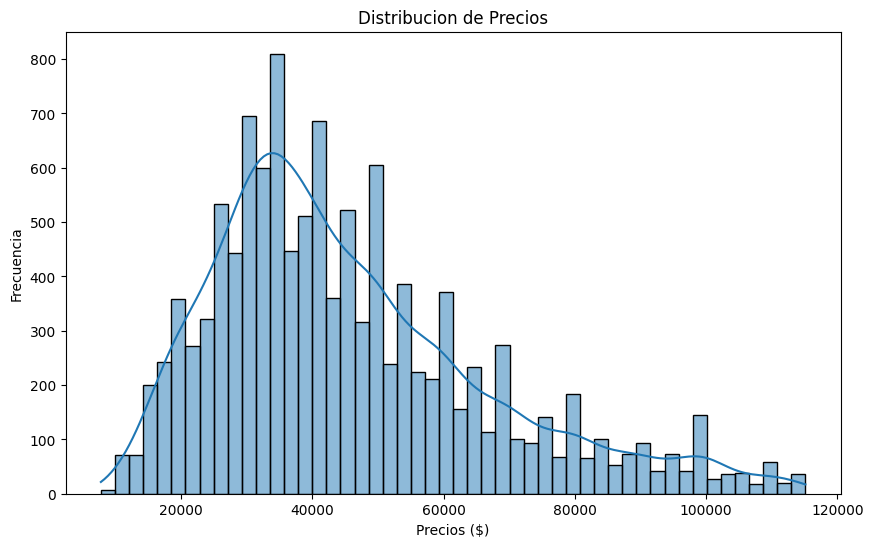

In [38]:
# Graficar la distribucion de precios en los anuncios
plt.figure(figsize=(10, 6))
sns.histplot(listings['price'], bins=50, kde=True)
plt.title('Distribucion de Precios')
plt.xlabel('Precios ($)')
plt.ylabel('Frecuencia')
plt.show()

#### Distribuci√≥n de Precios

- Distribuci√≥n sesgada a la derecha: hay m√°s datos concentrados entre los 20.000 y 60.000 CLP, con una "cola larga" hacia valores m√°s altos.
- Tendencia en torno a 35.000‚Äì40.000 CLP: ah√≠ se encuentra el pick m√°s alto de frecuencias.

## 3. An√°lisis de Tipo de Habitaci√≥n
- Analizar la distribuci√≥n de los diferentes tipos de habitaciones

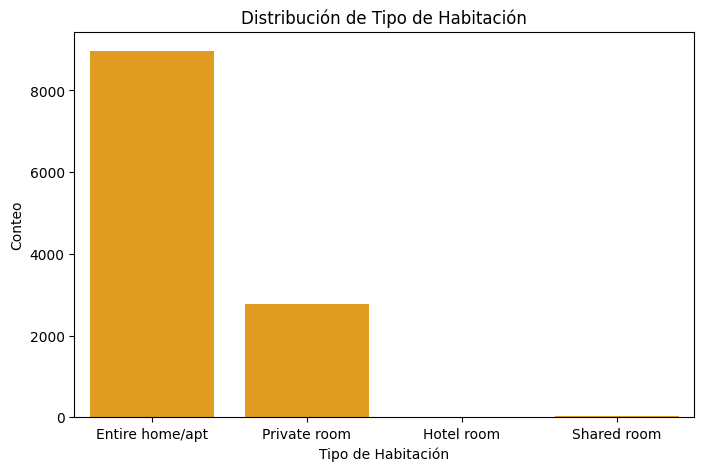

In [40]:
# Garficar  la distribucion por tipo de habitacion
plt.figure(figsize=(8, 5))
sns.countplot(x='room_type', data=listings , color='orange')
plt.title('Distribuci√≥n de Tipo de Habitaci√≥n')
plt.xlabel('Tipo de Habitaci√≥n')
plt.ylabel('Conteo')
plt.show()

#### Distribuci√≥n de tipo de habitaciones listadas:
La mayor√≠a de las habitaciones disponibles son casas enteras, seguidas por habitaciones privadas. En cambio, las habitaciones de hotel y las habitaciones compartidas son las menos frecuentes. Este patr√≥n podr√≠a reflejar una oferta m√°s amplia de casas enteras y habitaciones privadas en el mercado, mientras que las habitaciones de hotel y compartidas son opciones menos comunes.

## 4. Precio vs. Tipo de Habitacion
- Visualizar la relaci√≥n entre los precios y el tipo de habitaci√≥n.

/var/folders/82/grjgs_q959j1pwfb817_nsl80000gn/T/ipykernel_11663/1049329214.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Tipo de Habitaci√≥n')


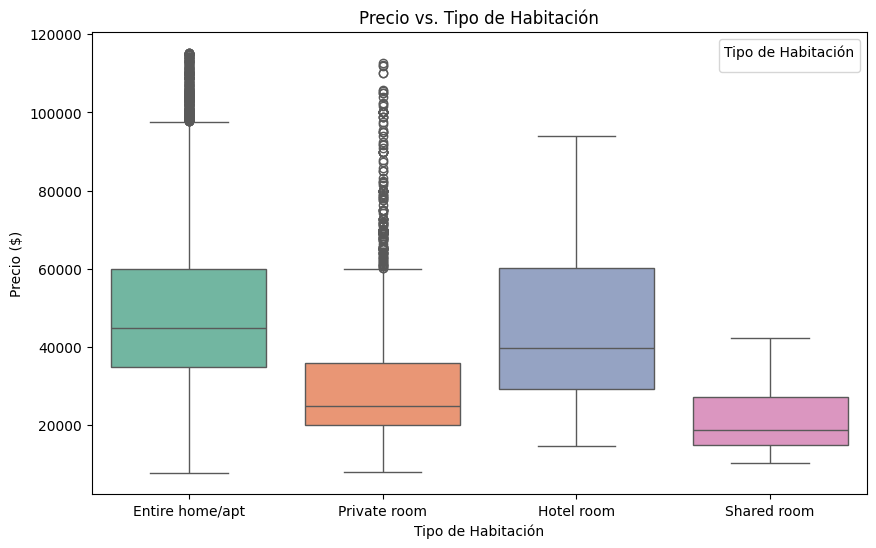

In [31]:
# Graficar la relaci√≥n entre los precios y los tipos de habitaciones
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', hue='room_type', data=listings, palette='Set2')
plt.title('Precio vs. Tipo de Habitaci√≥n')
plt.xlabel('Tipo de Habitaci√≥n')
plt.ylabel('Precio ($)')
plt.legend(title='Tipo de Habitaci√≥n')
plt.show()

#### Precios vs. tipo de habitaci√≥n

Las casas y apartamentos enteros, junto con las habitaciones de hotel, presentan en promedio los precios m√°s elevados. Sin embargo, en el caso de las casas enteras, se observa una gran variabilidad en los precios, que pueden elevarse significativamente.

Las habitaciones privadas, aunque tienen un precio promedio m√°s bajo en comparaci√≥n con las casas enteras y los hoteles, tambi√©n muestran una amplia dispersi√≥n, con algunas opciones considerablemente m√°s caras, probablemente dependiendo del vecindario donde se ubiquen.

Por √∫ltimo, las habitaciones compartidas suelen tener los precios m√°s bajos del mercado.

## 5. Distribuci√≥n de los Vecindarios
- Examinar la distribuci√≥n de los anuncios entre los distintos vecindarios.

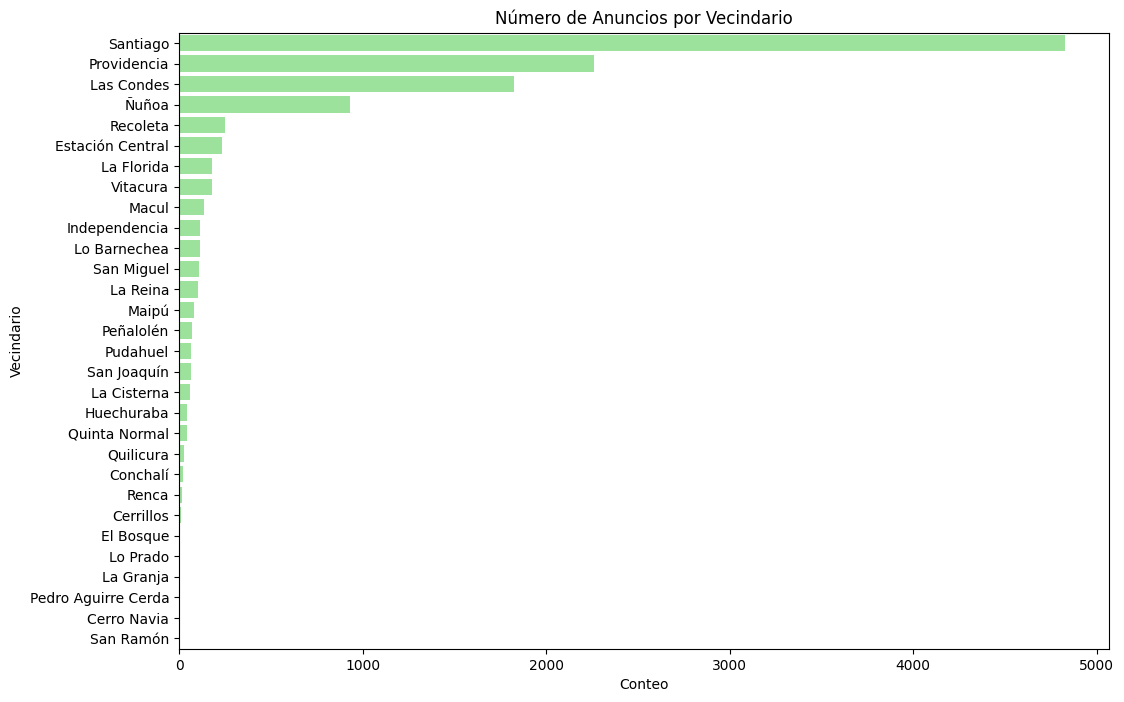

In [41]:
# Graficar la distribucion de anuncios en los vecindarios
plt.figure(figsize=(12, 8))
sns.countplot(y='neighbourhood', data=listings ,color="lightgreen" , order=listings['neighbourhood'].value_counts().index)
plt.title('N√∫mero de Anuncios por Vecindario')
plt.xlabel('Conteo')
plt.ylabel('Vecindario')
plt.show()

#### Distribuci√≥n de los vecindarios
Este gr√°fico muestra c√≥mo Santiago domina la escena, seguido por Providencia, Las Condes y √ëu√±oa. Las dem√°s zonas tienen una presencia mucho menor.

## 6. Rese√±as a lo Largo del Per√≠odo
- Visualizar el n√∫mero de rese√±as a lo largo del per√≠odo analizado

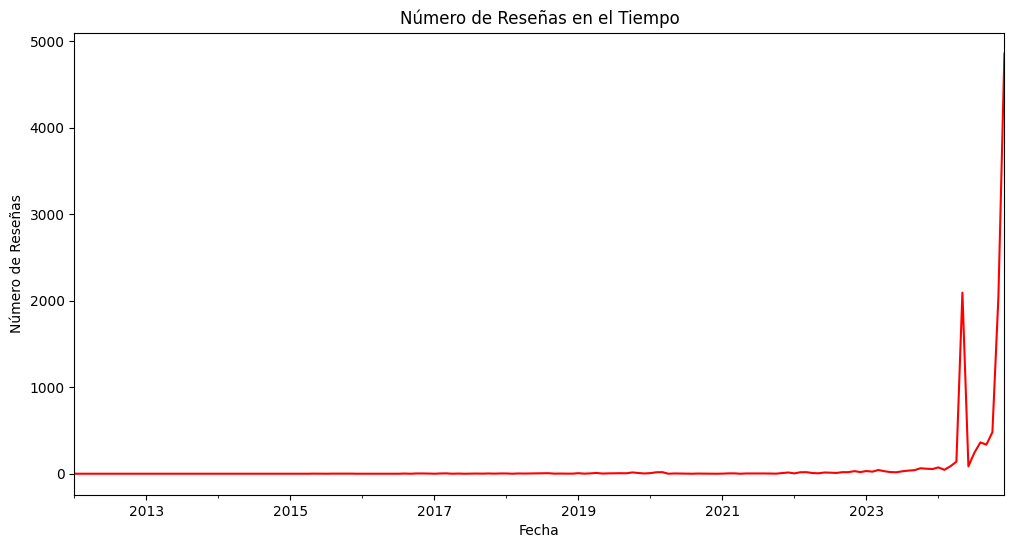

In [34]:
# Graficar el n√∫mero de rese√±as en el tiempo 
listings['last_review'] = pd.to_datetime(listings['last_review'])
reviews_over_time = listings.groupby(listings['last_review'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
reviews_over_time.plot(kind='line',color='red')
plt.title('N√∫mero de Rese√±as en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('N√∫mero de Rese√±as')
plt.show()

#### Rese√±as a lo largo del per√≠odo analizado
En este gr√°fico se observa un aumento significativo en la cantidad de rese√±as a partir del a√±o 2023, con un incremento a√∫n mayor en 2024. Esto podr√≠a deberse al aumento de la popularidad de la aplicaci√≥n Airbnb en los √∫ltimos a√±os, as√≠ como a la eliminaci√≥n de las restricciones de viaje impuestas en a√±os anteriores.

## 7. Insights clave del An√°lisis Exploratorio del Dataset de Airbnb üìä
A continuaci√≥n se presentan los hallazgos m√°s relevantes obtenidos del an√°lisis exploratorio de los datos de Airbnb en Santiago de Chile:

#### 1. Distribuci√≥n de Precios

- La distribuci√≥n de precios est√° sesgada a la derecha, con la mayor√≠a de los valores concentrados entre los 20.000 y 60.000 CLP.
- El mayor n√∫mero de publicaciones se concentra en un rango de precios cercano a los 35.000‚Äì40.000 CLP.
- Existen algunos valores significativamente m√°s altos, lo que indica la presencia de publicaciones premium o fuera del promedio.

#### 2. Distribuci√≥n del Tipo de Habitaci√≥n

- La mayor√≠a de las publicaciones corresponden a casas o apartamentos enteros, seguidos por habitaciones privadas.
- Las habitaciones compartidas y las habitaciones de hotel son considerablemente menos comunes.
- Este patr√≥n sugiere que la oferta en Santiago se inclina fuertemente hacia alojamientos completos y privados, posiblemente reflejando las preferencias de los anfitriones y hu√©spedes.

#### 3. Precios seg√∫n Tipo de Habitaci√≥n

- Las casas/apartamentos enteros y las habitaciones de hotel presentan los precios promedio m√°s elevados.
- Las casas enteras muestran una gran variabilidad de precios, con algunos alojamientos considerablemente m√°s costosos.
- Las habitaciones privadas tienden a ser m√°s accesibles, aunque tambi√©n presentan cierta dispersi√≥n en precios, probablemente relacionada con su ubicaci√≥n.
- Las habitaciones compartidas son, en general, la opci√≥n m√°s econ√≥mica.

#### 4. Distribuci√≥n Geogr√°fica de las Publicaciones

- Santiago concentra la mayor√≠a de las publicaciones.
- Le siguen Providencia, Las Condes y √ëu√±oa, aunque con una representaci√≥n notablemente menor en comparaci√≥n con la comuna de Santiago.
- Las dem√°s comunas tienen una presencia mucho m√°s reducida dentro del mercado.

#### 5. Tendencias Temporales en las Rese√±as

- Se observa un incremento significativo en la cantidad de rese√±as a partir del a√±o 2023.
- Este aumento contin√∫a en 2024, lo cual podr√≠a atribuirse al levantamiento de restricciones de viaje y al crecimiento de la popularidad de Airbnb en la regi√≥n.


#### ‚úÖ Conclusi√≥n

El an√°lisis exploratorio revela que la mayor√≠a de los alojamientos en Santiago est√°n dentro de un rango de precios moderado, concentr√°ndose especialmente en casas enteras y habitaciones privadas. Las casas completas suelen tener precios m√°s altos y una mayor variabilidad, mientras que las habitaciones compartidas son la opci√≥n m√°s econ√≥mica. Santiago lidera claramente la oferta de alojamientos en la regi√≥n, y se ha notado un crecimiento importante en la actividad de los usuarios desde 2023, lo que puede indicar una recuperaci√≥n del turismo y una mayor adopci√≥n de la plataforma. Estos hallazgos pueden ser √∫tiles tanto para anfitriones al definir sus estrategias de precios como para hu√©spedes al elegir la mejor opci√≥n seg√∫n sus necesidades.